# 크롤링 공부하기 
* from 13기 천재 조상연님 강의자료...bbb

In [1]:
import requests
import pandas as pd

from IPython import display

In [8]:
import json
from pandas.io.json import json_normalize

## HTML 구조 이해하기 
* https://flukeout.github.io/

In [22]:
display.HTML("""
<style>
    .blue {
        color:  blue;
    }
    
    .blue.blue2 {
        color: green;
    }
    
    #title {
        color: red;
    }
</style>
<div>
    <p class="blue blue2">1. 안녕하세요</p>
    <p>2. 안녕하세요</p>
    <p class="blue">3. 안녕하세요</p>
    <p>4. 안녕하세요</p>
    <p id="title">5. 안녕하세요</p>
    
</div>
""")

## Requests
1. Method 확인
2. 필요한 부품 (URL, Params, Header, Data) 체크
3. 결과 확인 및 오류 시 2번 사항 반복 체크
4. 결과 형식에 따라 파싱

### 1. get 방식 

In [33]:
def news_search_results(keyword) : 

    url = "https://search.naver.com/search.naver?where=news&sm=tab_jum&query="

    payload = {}
    
    my_params = {'where': 'news', 
                 'sm': 'tab_jum', 
                 'query': keyword}
    
    headers = {
      'Cookie': 'nx_ssl=2; page_uid=Uz/ebsprvmsssRTrhUlssssssSC-486880; _naver_usersession_=uHqHJ0mKO+hzkL4FTZEq5Q=='
    }

    response = requests.request("GET", url+keyword, headers=headers, data = payload)

    return response

In [34]:
news_search_results("테넷")

<Response [200]>

In [35]:
news_search_results("테넷").text[:500]

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="테넷 : 네이버 뉴스검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'테넷\'의 네이버 뉴스검색 결과입니다."> <meta name="description"'

## JSON 
* https://www.timeshighereducation.com/world-university-rankings/2020/world-ranking#
* Postman의 User-Agent로 데이터를 불러올 수 없는 경우 

In [15]:
def univ_ranking() : 
    url = "https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2020_0__24cc3874b05eea134ee2716dbf93f11a.json"

    payload = {}
    headers = {
      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36',
      'Cookie': 'siteCountry=GB; geoCountry=KR'
    }

    response = requests.request("GET", url, headers=headers, data = payload)

    return response

In [16]:
univ_ranking()

<Response [200]>

In [17]:
# 첫번째 방법 
result = univ_ranking().json()
df_univ_ranking = json_normalize(result["data"])

In [18]:
df_univ_ranking.head()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,url,nid,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,apply_link
0,10,1,University of Oxford,95.4,10,90.5,6,99.6,1,98.4,...,/world-university-rankings/university-oxford,468,United Kingdom,"20,664",11.2,41%,46 : 54,University of Oxford,"Mechanical & Aerospace Engineering,Computer Sc...",https://www.timeshighereducation.com/student/r...
1,20,2,California Institute of Technology,94.5,20,92.1,2,97.2,4,97.9,...,/world-university-rankings/california-institut...,128779,United States,"2,240",6.4,30%,34 : 66,California Institute of Technology caltech,"Biological Sciences,Mechanical & Aerospace Eng...",NaN
2,30,3,University of Cambridge,94.4,30,91.4,4,98.7,2,95.8,...,/world-university-rankings/university-cambridge,470,United Kingdom,"18,978",10.9,37%,47 : 53,University of Cambridge,"Languages, Literature & Linguistics,Computer S...",https://www.timeshighereducation.com/student/r...
3,40,4,Stanford University,94.3,40,92.8,1,96.4,5,99.9,...,/world-university-rankings/stanford-university,467,United States,"16,135",7.3,23%,43 : 57,Stanford University,"Archaeology,Physics & Astronomy,Law,General En...",NaN
4,50,5,Massachusetts Institute of Technology,93.6,50,90.5,5,92.4,10,99.5,...,/world-university-rankings/massachusetts-insti...,471,United States,"11,247",8.6,34%,39 : 61,Massachusetts Institute of Technology,"Veterinary Science,Languages, Literature & Lin...",NaN


In [20]:
# 두번째 방법 
result = json.loads(univ_ranking().text)
df_univ_ranking = json_normalize(result["data"])

In [21]:
df_univ_ranking.head()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,url,nid,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,apply_link
0,10,1,University of Oxford,95.4,10,90.5,6,99.6,1,98.4,...,/world-university-rankings/university-oxford,468,United Kingdom,"20,664",11.2,41%,46 : 54,University of Oxford,"Mechanical & Aerospace Engineering,Computer Sc...",https://www.timeshighereducation.com/student/r...
1,20,2,California Institute of Technology,94.5,20,92.1,2,97.2,4,97.9,...,/world-university-rankings/california-institut...,128779,United States,"2,240",6.4,30%,34 : 66,California Institute of Technology caltech,"Biological Sciences,Mechanical & Aerospace Eng...",NaN
2,30,3,University of Cambridge,94.4,30,91.4,4,98.7,2,95.8,...,/world-university-rankings/university-cambridge,470,United Kingdom,"18,978",10.9,37%,47 : 53,University of Cambridge,"Languages, Literature & Linguistics,Computer S...",https://www.timeshighereducation.com/student/r...
3,40,4,Stanford University,94.3,40,92.8,1,96.4,5,99.9,...,/world-university-rankings/stanford-university,467,United States,"16,135",7.3,23%,43 : 57,Stanford University,"Archaeology,Physics & Astronomy,Law,General En...",NaN
4,50,5,Massachusetts Institute of Technology,93.6,50,90.5,5,92.4,10,99.5,...,/world-university-rankings/massachusetts-insti...,471,United States,"11,247",8.6,34%,39 : 61,Massachusetts Institute of Technology,"Veterinary Science,Languages, Literature & Lin...",NaN


## BeautifulSoup를 이용한 HTML 파싱
* 많이 사용하기... 
* select 활용 잘 하기 ! 

In [23]:
from bs4 import BeautifulSoup

In [36]:
res = news_search_results("코로나")
if res.status_code == 200: print("OK!")

OK!


In [37]:
soup = BeautifulSoup(res.text, "html.parser") # parsing한 객체

In [39]:
soup.title.text

'코로나 : 네이버 뉴스검색'

In [41]:
# '코로나' 검색했을 때 뉴스 타이틀 
soup.select("#sp_nws1 > dl > dt > a")[0].text

'경찰청에 코로나19 첫 확진자 발생…청사 13층 폐쇄'

In [44]:
# 여러개 가져오기 
soup.select("._sp_each_title")[:3]

[<a class="_sp_each_title" href="http://yna.kr/AKR20200821040300004?did=1195m" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=880000D8_000000000000000011828634&amp;g=001.0011828634&amp;u='+urlencode(this.href));" target="_blank" title="경찰청에 코로나19 첫 확진자 발생…청사 13층 폐쇄">경찰청에 <strong class="hl">코로나</strong>19 첫 확진자 발생…청사 13층 폐쇄</a>,
 <a class="_sp_each_title" href="https://news.sbs.co.kr/news/endPage.do?news_id=N1005941323&amp;plink=ORI&amp;cooper=NAVER" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=3&amp;i=8800011C_000000000000000000836231&amp;g=055.0000836231&amp;u='+urlencode(this.href));" target="_blank" title='2차 재난지원금 나오나…코로나 재확산에 "추진 검토"'>2차 재난지원금 나오나…<strong class="hl">코로나</strong> 재확산에 "추진 검토"</a>,
 <a class="_sp_each_title" href="https://news.sbs.co.kr/news/endPage.do?news_id=N1005941790&amp;plink=ORI&amp;cooper=NAVER" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=8&amp;i=8800011C_000000000000000000836269&amp;g=055.0000836269&amp;u='+urlencode(this.href));" t

In [45]:
pd.DataFrame([
    [atag.text , atag["href"]]
    for atag in soup.select("._sp_each_title")
], columns=["title", "url"])

,title,url
0,경찰청에 코로나19 첫 확진자 발생…청사 13층 폐쇄,http://yna.kr/AKR20200821040300004?did=1195m
1,"2차 재난지원금 나오나…코로나 재확산에 ""추진 검토""",https://news.sbs.co.kr/news/endPage.do?news_id...
2,"靑 ""오늘부터 코로나19 비상 대응 체제 가동""",https://news.sbs.co.kr/news/endPage.do?news_id...
3,"올해 예비군훈련 전면 취소…""코로나 상황 엄중""(종합)",https://biz.chosun.com/site/data/html_dir/2020...
4,시총 1·2위도 코로나에 뚫렸다…대기업 방역망 '초비상',https://www.hankyung.com/economy/article/20200...
5,전주지법 부장판사 코로나19 확진…현직판사 첫 사례,http://www.hani.co.kr/arti/area/honam/958756.html
6,"""나 코로나 확진자야""...지하철서 마스크 안 쓰고 난동",https://www.ytn.co.kr/_ln/0103_202008211144052960
7,"'10초의 침묵' 文 ""코로나 최대 위기...방역 방해시 공권력 행사""[전문]",http://www.fnnews.com/news/202008211404413796
8,"[단독] 코로나 한창때 정부가 뿌린 쿠폰 284만장, 21%는 이미 사용",https://news.chosun.com/site/data/html_dir/202...
9,"추미애 ""코로나 방역활동 악의적 저해시 구속수사""",http://news.khan.co.kr/kh_news/khan_art_view.h...


## Selenium 활용한 크롤링


**셀레니움 이란?**

- 원래 웹 테스팅 용도로 개발
- 그러다보니 웹에서 하는 모든 행위를 다 할 수 있음
- 이러한 기능을 통해 크롤링이 힘들거나 어려운 사이트를 노가다를 통해 크롤링 할 수 있게함

**셀레니움 동작 순서**

1. driver 파일을 다운로드 받고 노트북 파일과 같은 위치에 넣어준다.      

2. `driver = webdriver.Chrome(드라이버 경로)`를 통해 드라이버를 불러온다.          
    2.1. 이 때 안 보이게 하고 싶다면 headless 옵션을 이용한다.       
    
3. 해당 드라이버가 켜진 것을 확인    

4. `driver.get(URL)`을 이용해 원하는 페이지로 이동한다.       
  
5. `driver.find_element[s]_by_css_selector` 를 이용하여 원하는 부분을 찾는다.        
    5.0. 찾은 결과는 element이며 element.text를 통해 안 내용을 불러올 수 있다.      
    5.1. `element.send_keys(원하는 내용,ID,PW)`을 통해 값을 입력할 수 있다.        
    5.2. `element.click()`을 통해 버튼 등을 클릭할 수 있다.     
    
6. `driver.page_source`를 통해 전체 페이지 내용을 불러올 수 있다.         
    6.1. 만약 소스에 내가 원하는 내용이 없다면 iframe에 있을 가능성이 있다.     
    6.2. 이러한 경우 `driver.switch_to.frame(해당 ifram element)`로 이동한다.     
    6.3. Alert, 다른 창으로 열기 등 다양한 변수에 대해서도 `driver.switch_to`로 대응이 가능         
    
7. `driver.close()`로 해당 드라이버를 종료한다.     



In [46]:
from selenium import webdriver
from IPython.display import Image
import os
from pathlib import Path
import glob

In [47]:
# 현재 위치 확인 
print(f"Directory Path: {Path().absolute()}")

Directory Path: C:\Users\LG\Jupyter Notebook\ToBigs\14기\week5\Crawling


In [48]:
# 현재 폴더 내 크롬 드라이버 명 확인
glob.glob("chrome*") 

['chromedriver.exe']

In [49]:
# 크롬 드라이버 path 생성 
driver_path = os.path.join(Path().absolute(), "chromedriver.exe")

In [50]:
driver = webdriver.Chrome(driver_path)
driver.get("https://www.naver.com") # 네이버 페이지가 나옴! 

In [52]:
driver.quit()

### Headless 옵션
* 간혹 어떤 서버들에서는 이런 Headless모드를 감지함..! 

In [51]:
from selenium.webdriver.chrome.options import Options

In [53]:
options = Options()
options.headless = True # True면 창이 안뜸
driver = webdriver.Chrome(driver_path, options=options)

In [56]:
driver.set_window_size(1920, 1080)

In [54]:
driver.get("https://www.naver.com") # get : 주소 이동 

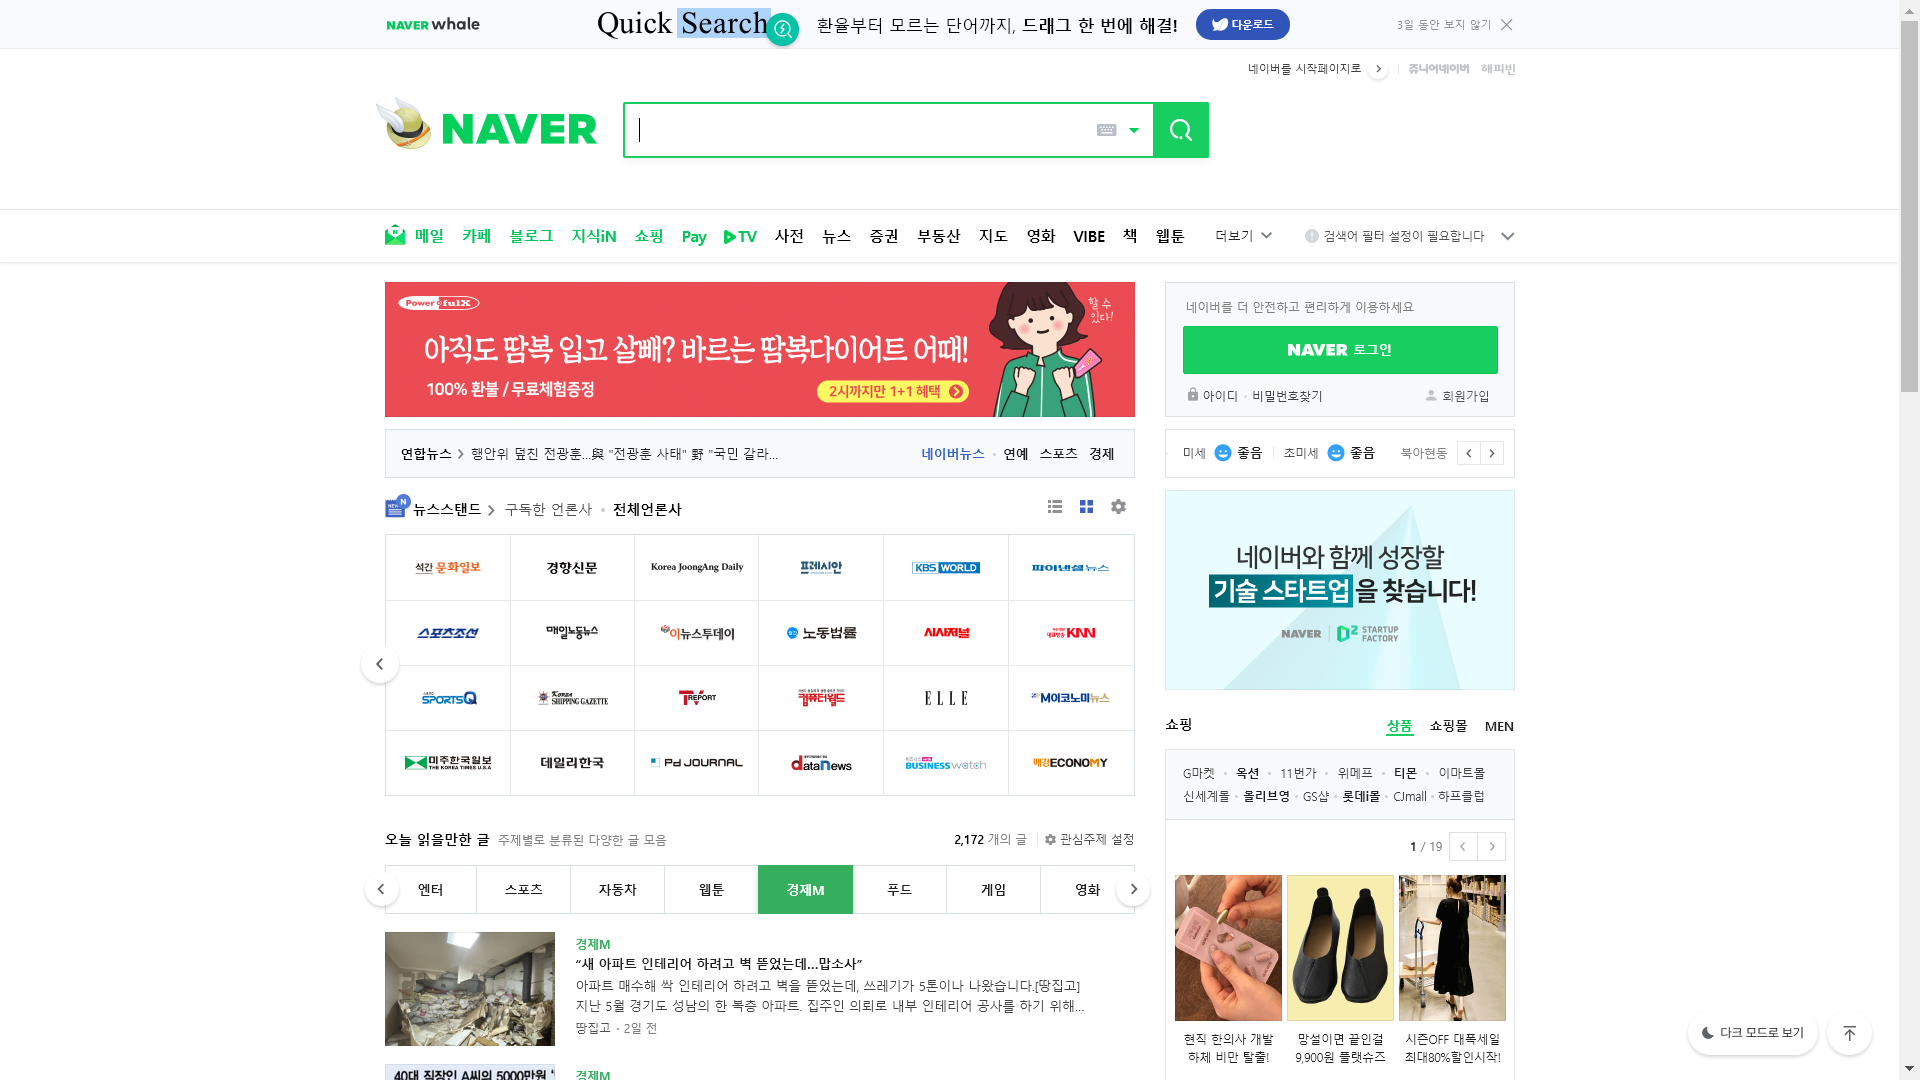

In [57]:
Image(driver.get_screenshot_as_png())

In [58]:
driver.get("https://www.coupang.com/np/search?component=&q=%ED%95%84%EB%9D%BC%EB%8D%B8%ED%94%BC%EC%95%84+%EC%B9%98%EC%A6%88+%EC%BC%80%EC%9D%B5&channel=auto")

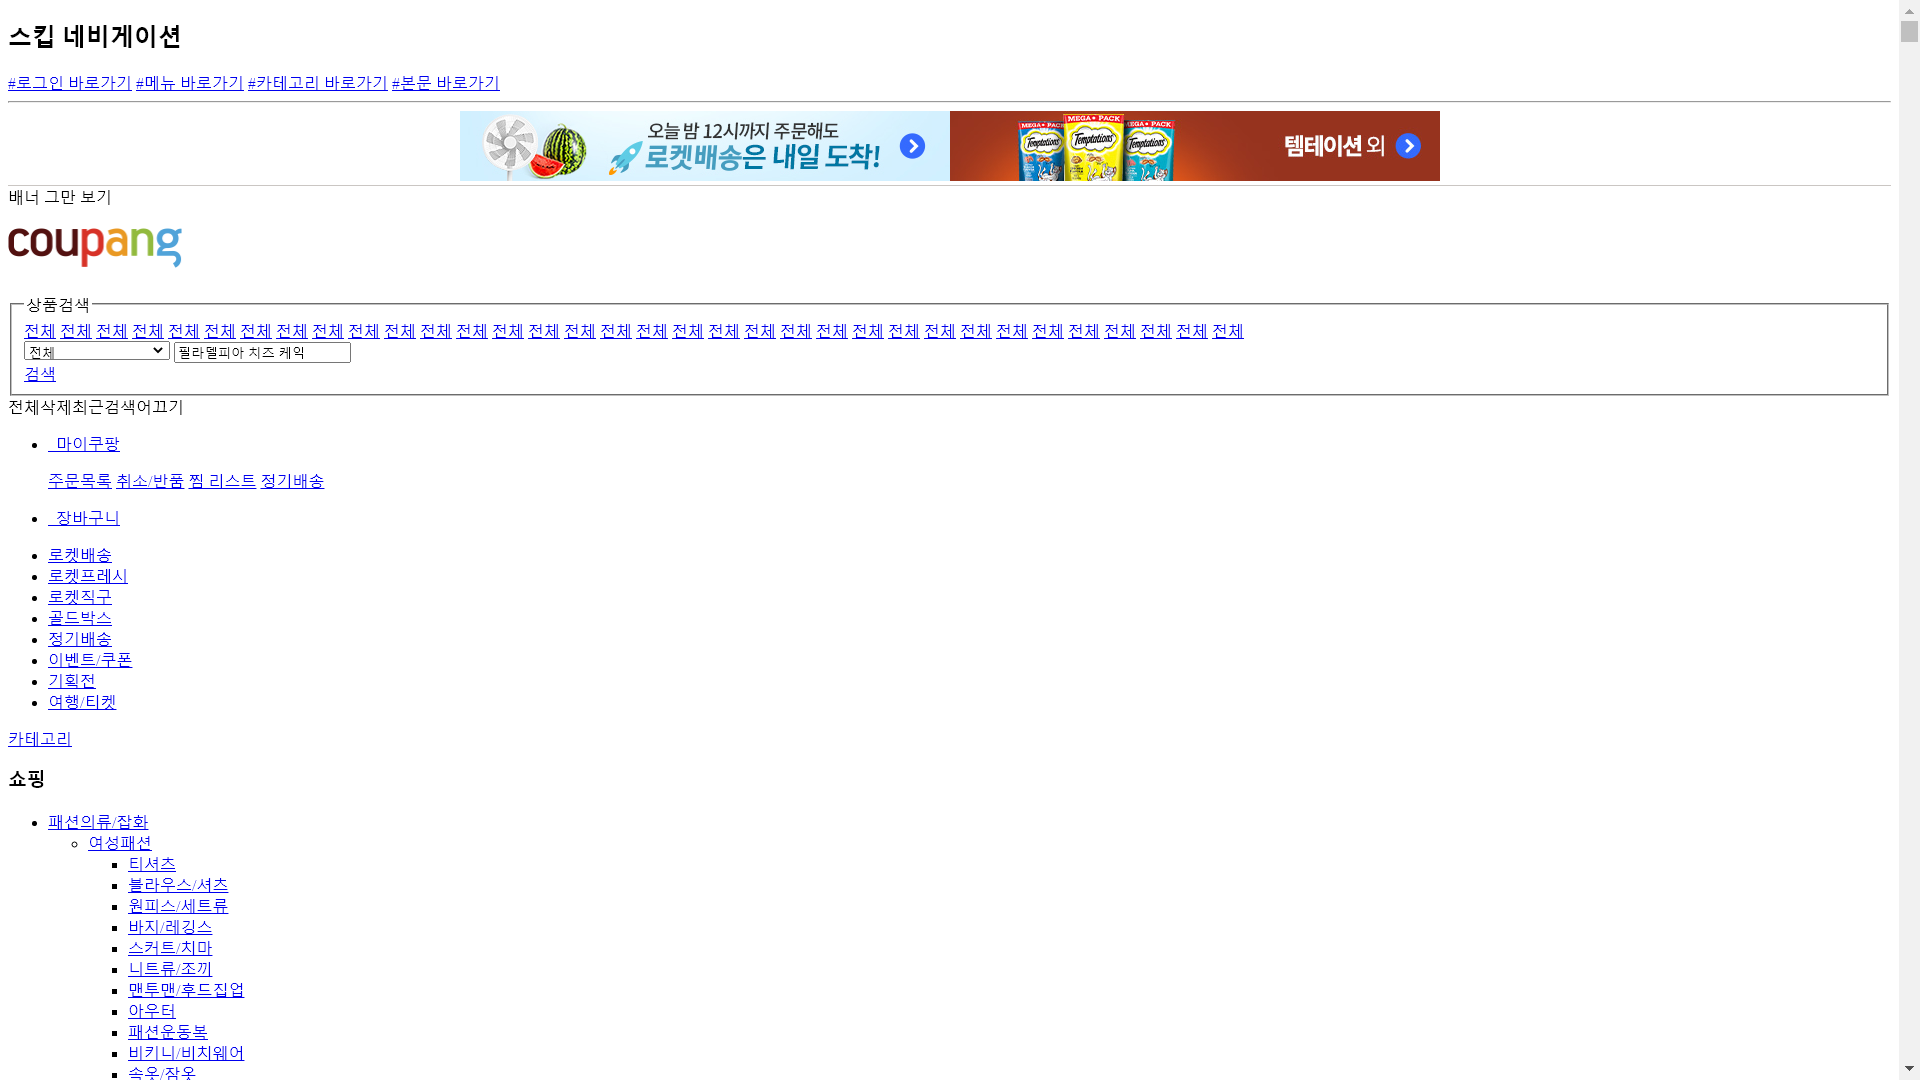

In [59]:
Image(driver.get_screenshot_as_png())

In [60]:
driver.execute_script("return navigator.userAgent") # HeadlessChrome이 뜸...! 

'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/84.0.4147.135 Safari/537.36'

In [61]:
driver.quit()

In [220]:
# 해결법 (쿠팡은 Headless를 막아버린 것 ...)
options.headless = False
driver = webdriver.Chrome(driver_path, options=options)

In [221]:
driver.get("https://www.coupang.com/np/search?component=&q=%ED%95%84%EB%9D%BC%EB%8D%B8%ED%94%BC%EC%95%84+%EC%B9%98%EC%A6%88+%EC%BC%80%EC%9D%B5&channel=auto")

In [65]:
driver.set_window_size(1920, 1080)

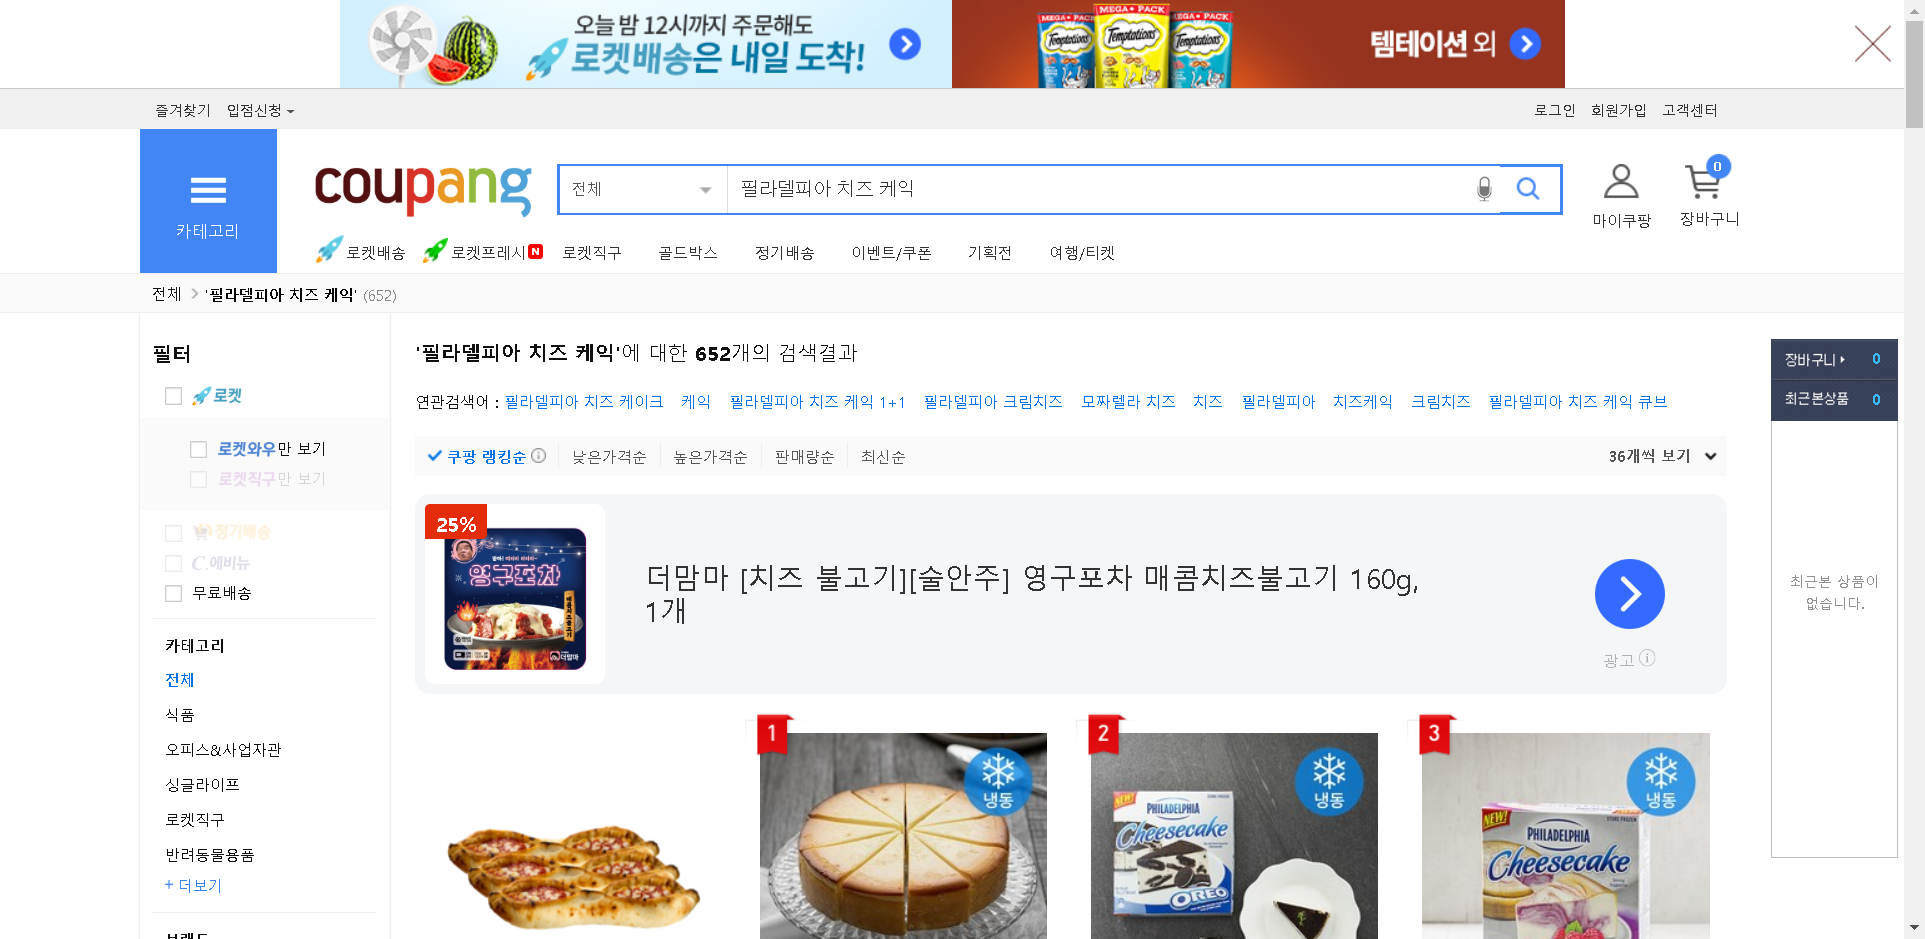

In [66]:
Image(driver.get_screenshot_as_png())

In [68]:
# search-product
driver.find_elements_by_css_selector("li.search-product")[:3]

[<selenium.webdriver.remote.webelement.WebElement (session="441f4e024a3697b5ea8214c328482714", element="1b84b9d2-ef95-49a6-8b75-b37b6c379a90")>,
 <selenium.webdriver.remote.webelement.WebElement (session="441f4e024a3697b5ea8214c328482714", element="fd9496a0-1b74-4e31-b78c-99bbbc6776b1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="441f4e024a3697b5ea8214c328482714", element="ac89ae55-e904-420e-9747-63a5bf778f4a")>]

In [70]:
# Parsing 1 
pd.DataFrame([
    liTag.text
    for liTag in driver.find_elements_by_css_selector("li.search-product")
]).head()

,0
0,"광고\n쏘렌티나 피자 모짜렐라토마토 3개입, 180g\n17,500원\n수요일 8/..."
1,"필라델피아 치즈케익 플레인 (냉동), 794g, 1개\n5% 18,900\n17,9..."
2,"필라델피아 오레오 치즈케익 (냉동), 794g, 1개\n5% 19,050\n18,0..."
3,"필라델피아 치즈케익 라즈베리 스월 (냉동), 794g, 1개\n5% 18,900\n..."
4,"광고\n서울브레드 초코 크림케이크 (냉동), 100g, 5개입\n17,900원\n(..."


In [71]:
pd.DataFrame([
    [element.find_element_by_css_selector("div.name").text, 
     element.find_element_by_css_selector("strong.price-value").text]
    
    for element in driver.find_elements_by_css_selector("li.search-product")
    
], columns = ["product", "price"])[1:6]

,product,price
1,"필라델피아 치즈케익 플레인 (냉동), 794g, 1개","17,900"
2,"필라델피아 오레오 치즈케익 (냉동), 794g, 1개","18,040"
3,"필라델피아 치즈케익 라즈베리 스월 (냉동), 794g, 1개","17,820"
4,"서울브레드 초코 크림케이크 (냉동), 100g, 5개입","17,900"
5,"서울브레드 케이크 베스트 100g x 5종 세트 (냉동), 1세트","17,900"


In [75]:
# 좀 더 정확하게 찾으려면 re 사용해서 찾아야할듯 ...?! 
pd.DataFrame([
    [element.find_element_by_css_selector("div.name").text.split(",")[0], 
     element.find_element_by_css_selector("strong.price-value").text]
    
    for element in driver.find_elements_by_css_selector("li.search-product")
    
], columns = ["product", "price"])[1:6]

,product,price
1,필라델피아 치즈케익 플레인 (냉동),"17,900"
2,필라델피아 오레오 치즈케익 (냉동),"18,040"
3,필라델피아 치즈케익 라즈베리 스월 (냉동),"17,820"
4,서울브레드 초코 크림케이크 (냉동),"17,900"
5,서울브레드 케이크 베스트 100g x 5종 세트 (냉동),"17,900"


### BeautifulSoup를 이용한 다른 방법 

In [222]:
# driver.page_source : txt 정보
soup = BeautifulSoup(driver.page_source, "html.parser")

In [84]:
soup.select("a > dl > dd > div > div.name")[1:6]

[<div class="name">필라델피아 치즈케익 플레인 (냉동), 794g, 1개</div>,
 <div class="name">필라델피아 오레오 치즈케익 (냉동), 794g, 1개</div>,
 <div class="name">필라델피아 치즈케익 라즈베리 스월 (냉동), 794g, 1개</div>,
 <div class="name">서울브레드 초코 크림케이크 (냉동), 100g, 5개입</div>,
 <div class="name">서울브레드 케이크 베스트 100g x 5종 세트 (냉동), 1세트</div>]

In [86]:
# .text 는 list에 적용 불가능.. 하나만 가능 ! 
soup.select("a > dl > dd > div > div.name")[1].text 

'필라델피아 치즈케익 플레인 (냉동), 794g, 1개'

In [99]:
soup.select(".search-product-link")[0]

<a class="search-product-link" data-is-soldout="" data-item-id="2540042096" data-product-id="1478504081" data-srp-log='{"group":"PRODUCT", "itemId":"2540042096", "productId":"1478504081", "vendorItemId":"70532707841", "page":"1", "listSize":"36", "isCcidEligible":false, "displayCcidBadge":false, "wowOnlyInstantDiscountRate": -1, "snsDiscountRate" : -1 }' data-vendor-item-id="70532707841" href="/vp/products/1478504081?itemId=2540042096&amp;vendorItemId=70532707841&amp;sourceType=srp_product_ads&amp;q=%ED%95%84%EB%9D%BC%EB%8D%B8%ED%94%BC%EC%95%84+%EC%B9%98%EC%A6%88+%EC%BC%80%EC%9D%B5&amp;itemsCount=40&amp;searchId=9442a48540924e9bbadd80ceacac724a&amp;rank=0" style="height: 482px;" target="_blank"><dl class="search-product-wrap" style="height: 482px;"><dt class="image"> <img alt="쏘렌티나 피자 모짜렐라토마토 3개입, 180g" class="search-product-wrap-img" data-load-time="1621.1699999985285" data-load-time-end="1616.05499999132" data-load-time-start="649.5549999526702" data-src="data:image/gif;base64,R0lGOD

In [223]:
# 왜 list 형식으로 값이 나올까 ? -> .text 
pd.DataFrame([
    [element.select_one("div.name").text, element.select_one("div.price strong").text] 
    for element in soup.select(".search-product-link")
    
], columns = ["product", "price"])[1:6]

,product,price
1,"필라델피아 오레오 치즈케익 (냉동), 794g, 1개","18,040"
2,"필라델피아 치즈케익 라즈베리 스월 (냉동), 794g, 1개","17,820"
3,"필라델피아 치즈 케이크, 1.7kg, 1개","29,890"
4,"서울브레드 케이크 베스트 100g x 5종 세트 (냉동), 1세트","17,900"
5,"CJ 고메 바삭튀겨낸모짜렐라돈카츠 450g X 3개, 없음, 상세설명 참조","19,900"


In [100]:
driver.close()

## 인스타그램 크롤링 

In [127]:
driver = webdriver.Chrome(driver_path)
driver.get("https://www.instagram.com/explore/tags/%ED%8F%AC%EB%A9%94%EB%9D%BC%EB%8B%88%EC%95%88/")

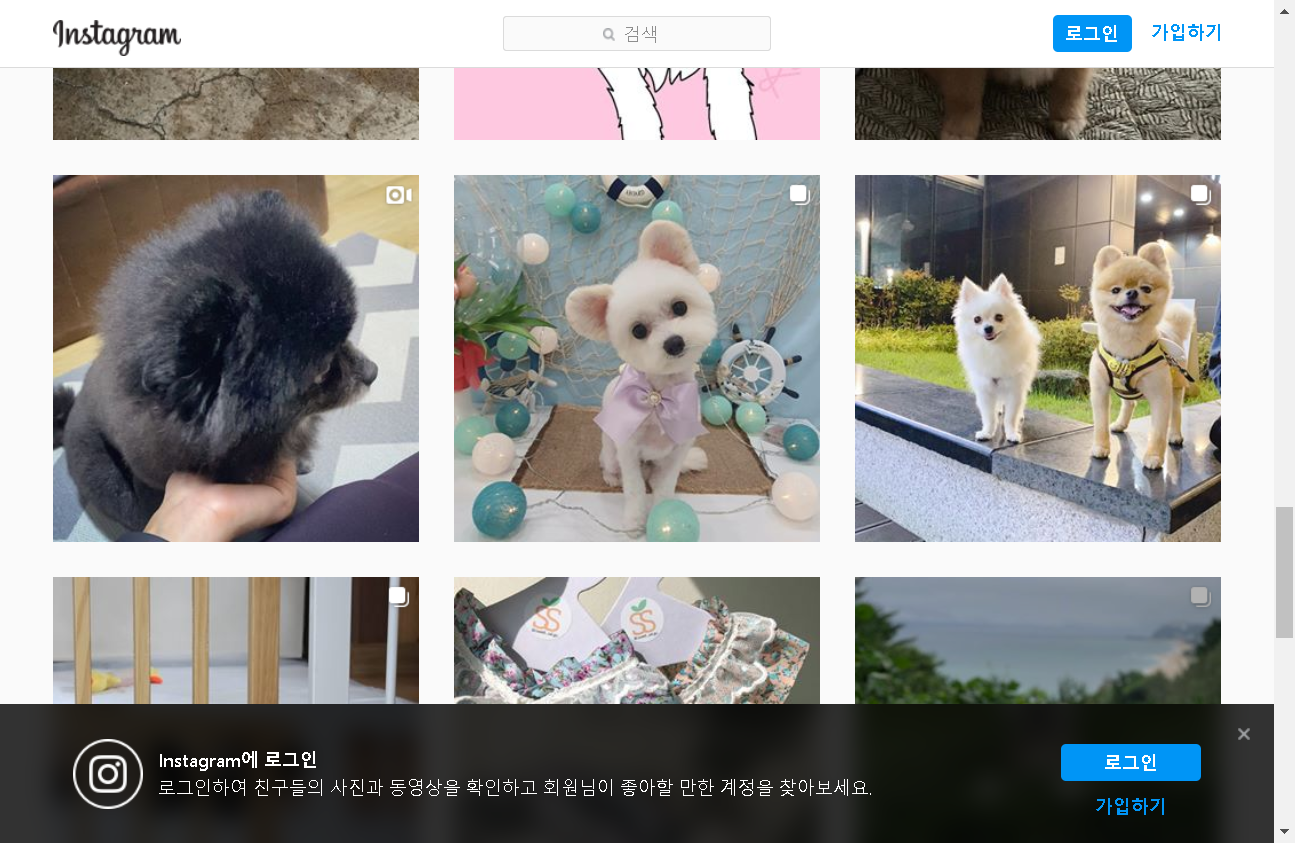

In [102]:
Image(driver.get_screenshot_as_png(), width=500)

In [108]:
# 무한 scrolling 
MAX_HEIGHT = 3000000
driver.execute_script(f"window.scrollTo(0,{MAX_HEIGHT})")

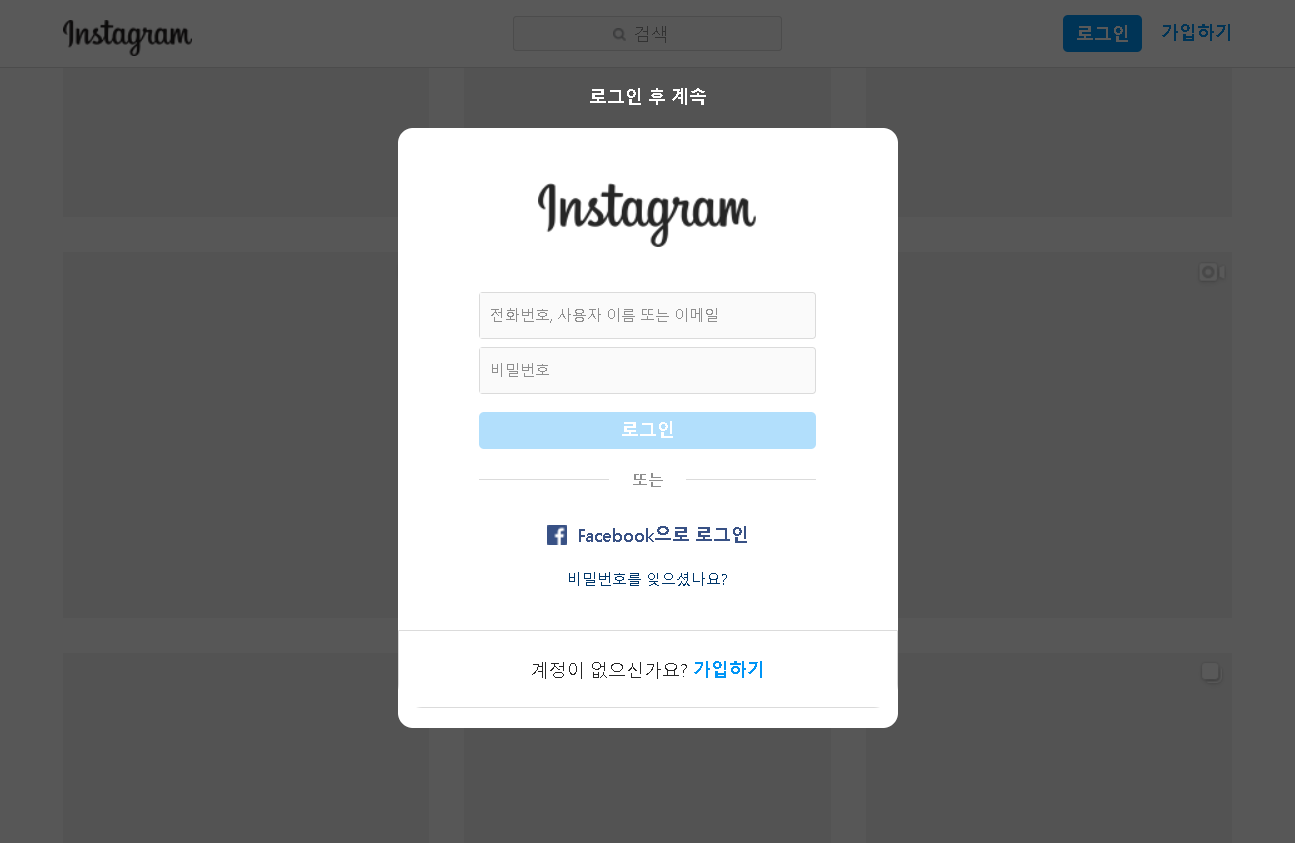

In [109]:
# 내려가다가 멈춤 
Image(driver.get_screenshot_as_png(), width=500)

In [110]:
soup = BeautifulSoup(driver.page_source,"html.parser")
elements = soup.select("div.v1Nh3.kIKUG._bz0w")

In [111]:
len(elements) # 66개 나오고 끝..! 

66

In [130]:
MAX_HEIGHT = 100000000
driver.execute_script(f"window.scrollTo(0,{MAX_HEIGHT})")

In [131]:
# SendKey 
driver.find_element_by_css_selector('input[name="username"]').send_keys("?")
driver.find_element_by_css_selector('input[name="password"]').send_keys("?")
driver.find_element_by_css_selector('button[type="submit"]').click()

In [133]:
# 로그인 정보저장 나중에 하기 ... 
driver.find_element_by_css_selector('button[class="sqdOP yWX7d    y3zKF     "]').click()

In [144]:
MAX_HEIGHT = 500000000 # 위에 있는게 없어져서...... -> 쪼끔 내리고 크롤링하고 + 쪼끔 내리고 크롤링하고 
driver.execute_script(f"window.scrollTo(0,{MAX_HEIGHT})")

In [145]:
soup = BeautifulSoup(driver.page_source,"html.parser")
elements = soup.select("div.v1Nh3.kIKUG._bz0w")

In [146]:
len(elements)

57

In [147]:
driver.close()

## 동적 웹사이트 XHR 크롤링
* Selenium 쓰지 않고도 크롤링 가능 ! 
* 정보도 많고, 깔끔하게 가져올 수 있음 

In [148]:
def instagram_tag(tag) : 
    
    url = f"https://www.instagram.com/explore/tags/{tag}/?__a=1"

    payload = {}
    headers = {
      'Cookie': 'ig_did=0ABA19E8-E04A-4C72-BC3E-31C986FB85C0; csrftoken=UBCPMhZnrWsV0W0UoMc8rLzhuky55RL5; rur=FRC; mid=X0Ci2gAEAAGIHYopnc9CxEMMvuCo; urlgen="{\\"122.46.232.47\\": 17858}:1k9LP1:h7XI11OsndUEtz_gkV7qLjrZzio"'
    }

    response = requests.request("GET", url, headers=headers)
    
    return response

In [149]:
res = instagram_tag("포메라니안")

In [150]:
res

<Response [200]>

In [153]:
res.json() # 정보가 너무 많다 

{'graphql': {'hashtag': {'id': '17841528820113886',
   'name': '포메라니안',
   'allow_following': False,
   'is_following': False,
   'is_top_media_only': False,
   'profile_pic_url': 'https://scontent-ssn1-1.cdninstagram.com/v/t51.2885-15/e35/c0.180.1440.1440a/s150x150/117659218_154183706285926_8761701932637300428_n.jpg?_nc_ht=scontent-ssn1-1.cdninstagram.com&_nc_cat=110&_nc_ohc=WATq0CO5KvcAX_30Q1-&oh=be3171a03b2d81e59679342ddbff944f&oe=5F6AAE70',
   'edge_hashtag_to_media': {'count': 4433272,
    'page_info': {'has_next_page': True,
     'end_cursor': 'QVFEOGtRUDNPRUY0OFRIN0dRRUtHRmFPWFJUVm9DQWxyNG5URnpxNkRQclpwUmNrZU5rMFQ5X09BRmgzZi01RmtXUFRuek1vSnVaX2NVeHluMklWNWtxUw=='},
    'edges': [{'node': {'comments_disabled': False,
       '__typename': 'GraphSidecar',
       'id': '2381120578604936923',
       'edge_media_to_caption': {'edges': [{'node': {'text': '갸우뚱#포메#강아지#애견#포메라니안 #강아지그램 #강아지일상#일상#데일리#반려견'}}]},
       'shortcode': 'CELcIzvHq7b',
       'edge_media_to_comment': {'count': 0},


In [154]:
def get_json_by_path(path, js) : 
    path_arr = path.split(".")
    while path_arr : 
        key = path_arr.pop(0)
        js = js.get(key, {})
    return js

In [155]:
# copy property path : 경로 주어짐 
result_json = res.json() 
edges = get_json_by_path('graphql.hashtag.edge_hashtag_to_media.edges', result_json)

In [156]:
json_normalize(edges)

,node.comments_disabled,node.__typename,node.id,node.edge_media_to_caption.edges,node.shortcode,node.edge_media_to_comment.count,node.taken_at_timestamp,node.dimensions.height,node.dimensions.width,node.display_url,node.edge_liked_by.count,node.edge_media_preview_like.count,node.owner.id,node.thumbnail_src,node.thumbnail_resources,node.is_video,node.accessibility_caption,node.product_type,node.video_view_count
0,False,GraphSidecar,2381120578604936923,[{'node': {'text': '갸우뚱#포메#강아지#애견#포메라니안 #강아지그램...,CELcIzvHq7b,0,1598071714,750,750,https://scontent-ssn1-1.cdninstagram.com/v/t51...,0,0,11592936892,https://scontent-ssn1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-ssn1-1.cdninstagram...,False,None,NaN,NaN
1,False,GraphSidecar,2381120574343025269,[{'node': {'text': '. MYSTERYGOLF R LINE WOOD ...,CELcIvxFxJ1,0,1598071713,1080,1080,https://scontent-ssn1-1.cdninstagram.com/v/t51...,0,0,3201419285,https://scontent-ssn1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-ssn1-1.cdninstagram...,False,Photo shared by 골프스튜디오 [CLUB MAKING & FITTING]...,NaN,NaN
2,False,GraphVideo,2381119574386782723,[{'node': {'text': '날쌘돌이 #귀여워❤️🐶 . . . . . . ....,CELb6MfDbID,0,1598071709,750,750,https://scontent-ssn1-1.cdninstagram.com/v/t51...,2,2,39144850085,https://scontent-ssn1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-ssn1-1.cdninstagram...,True,None,feed,0.0
3,False,GraphSidecar,2381120355148055018,[{'node': {'text': '・ ・ ・ 手術前以来のシャンプー シャンプー後に気...,CELcFjoDUHq,0,1598071687,1080,1080,https://scontent-ssn1-1.cdninstagram.com/v/t51...,1,1,30765946326,https://scontent-ssn1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-ssn1-1.cdninstagram...,False,"Photo by こむぎ꒰⑅ˊ͈ ˙̫ ˋ͈⑅꒱ on August 21, 2020.",NaN,NaN
4,False,GraphImage,2381120268763382256,[{'node': {'text': '안녕하개♡ 굿모닝 . . . . . #탄 #탄이...,CELcETLH8Hw,0,1598071677,1080,1080,https://scontent-ssn1-1.cdninstagram.com/v/t51...,1,1,39496370900,https://scontent-ssn1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-ssn1-1.cdninstagram...,False,"Photo by 탄 in Seoul, Korea. Image may contain:...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,False,GraphImage,2380640332237819280,[{'node': {'text': '메롱~🤪'}}],CEJu8TdAM2Q,4,1598014464,1080,1080,https://scontent-ssn1-1.cdninstagram.com/v/t51...,49,49,39256501267,https://scontent-ssn1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-ssn1-1.cdninstagram...,False,"Photo by 조랭이 on August 21, 2020. Image may...",NaN,NaN
68,False,GraphSidecar,2380609372989556885,[{'node': {'text': '째려보지 말라고 누굴닮ᄋ...,CEJn5yaAgiV,10,1598010773,1080,1080,https://scontent-ssn1-1.cdninstagram.com/v/t51...,45,45,10156545137,https://scontent-ssn1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-ssn1-1.cdninstagram...,False,Photo shared by 인스타충 수현잉 on August ...,NaN,NaN
69,False,GraphImage,2380597142466259189,[{'node': {'text': '우주선에서 찍은 덜컹ᄃ...,CEJlHz2Auj1,13,1598009315,1080,1080,https://scontent-ssn1-1.cdninstagram.com/v/t51...,47,47,10156545137,https://scontent-ssn1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-ssn1-1.cdninstagram...,False,"Photo by 인스타충 수현잉 on August 21, 202...",NaN,NaN
70,False,GraphSidecar,2380377207535038215,[{'node': {'text': '나 기엽징 ෆ⃛( ்́ꇴ ்̀)ෆ⃛'}}],CEIzHVej-8H,6,1597983097,750,750,https://scontent-ssn1-1.cdninstagram.com/v/t51...,309,309,32027317437,https://scontent-ssn1-1.cdninstagram.com/v/t51...,[{'src': 'https://scontent-ssn1-1.cdninstagram...,False,"Photo by 밍키 on August 20, 2020. Image may c...",NaN,NaN


## iframe 
* 네이버 환율 정보 크롤링 
* 페이지가 분리 되어 있는 경우 

In [202]:
driver = webdriver.Chrome(driver_path)
driver.get("https://finance.naver.com/marketindex/exchangeDetail.nhn?marketindexCd=FX_USDKRW")

In [203]:
driver.switch_to.frame(driver.find_element_by_css_selector("iframe[title='일별시세']"))

In [204]:
soup = BeautifulSoup(driver.page_source, "html.parser")

In [205]:
soup.select("table.tbl_exchange.today")

[<table border="1" class="tbl_exchange today" summary="일별 환율 리스트">
 <caption>일별 환율</caption>
 <colgroup>
 <col width="78"/>
 <col width="78"/>
 <col width="73"/>
 <col width="76"/>
 <col width="76"/>
 <col width="76"/>
 <col width="78"/>
 <col width="85"/>
 </colgroup>
 <thead>
 <tr>
 <th class="th_today1" rowspan="2"><span>날짜</span></th>
 <th class="th_today2" rowspan="2"><span>매매기준율</span></th>
 <th class="th_today3" rowspan="2"><span>전일대비</span></th>
 <th class="th_today4" colspan="2"><span>현찰</span></th>
 <th class="th_today5" colspan="2"><span>송금</span></th>
 <th class="th_today6" rowspan="2"><span>T/C 사실때</span></th>
 <th class="th_today7" rowspan="2"><span>외화수표 파실 때</span></th>
 </tr>
 <tr>
 <th class="th_today9"><span>사실 때 </span></th>
 <th class="th_today10"><span>파실 때 </span></th>
 <th class="th_today11"><span>보내실 때 </span></th>
 <th class="th_today12"><span>받으실 때</span></th>
 </tr>
 </thead>
 <tbody>
 <tr class="up">
 <td class="date">2020.08.21</td>
 <td class="num">1,189.5

In [217]:
df = pd.DataFrame([
    [element.select_one("td.date").text , element.select_one("td.num").text]
    for element in soup.select("table.tbl_exchange.today tr")[3:10] 
    
], columns = ["고시회차", "매매기준율"])

In [218]:
df

,고시회차,매매기준율
0,2020.08.20,"1,188.50"
1,2020.08.19,"1,178.00"
2,2020.08.18,"1,184.50"
3,2020.08.14,"1,187.50"
4,2020.08.13,"1,184.50"
5,2020.08.12,"1,184.50"
6,2020.08.11,"1,184.50"


In [224]:
driver.close()

### pd.read_html
* list 안에 dataframe이 있는 형태 

In [200]:
# 더 간단한 방법 
pd.read_html("https://finance.naver.com/marketindex/exchangeDailyQuote.nhn?marketindexCd=FX_USDKRW")[0]

날짜   매매기준율  전일대비       현찰               송금          T/C 사실때  \
           날짜   매매기준율  전일대비     사실 때     파실 때   보내실 때   받으실 때  T/C 사실때   
0  2020.08.21  1189.5   1.0  1210.31  1168.69  1201.1  1177.9  1203.77   
1  2020.08.20  1188.5  10.5  1209.29  1167.71  1200.1  1176.9  1202.76   
2  2020.08.19  1178.0   6.5  1198.61  1157.39  1189.5  1166.5  1192.13   
3  2020.08.18  1184.5   3.0  1205.22  1163.78  1196.1  1172.9  1198.71   
4  2020.08.14  1187.5   3.0  1208.28  1166.72  1199.1  1175.9  1201.75   
5  2020.08.13  1184.5   0.0  1205.22  1163.78  1196.1  1172.9  1198.71   
6  2020.08.12  1184.5   0.0  1205.22  1163.78  1196.1  1172.9  1198.71   
7  2020.08.11  1184.5   3.0  1205.22  1163.78  1196.1  1172.9  1198.71   
8  2020.08.10  1187.5   1.0  1208.28  1166.72  1199.1  1175.9  1201.75   
9  2020.08.07  1188.5   3.0  1209.29  1167.71  1200.1  1176.9  1202.76   

  외화수표 파실 때  
  외화수표 파실 때  
0   1177.23  
1   1176.24  
2   1165.85  
3   1172.24  
4   1175.24  
5   1172.24  
6   1172.24  
7   1172.24  
8   1175.24  
9   1176.24

In [196]:
def get_ex_usd_by_page(n) : 
    try:
        return pd.read_html(f"https://finance.naver.com/marketindex/exchangeDailyQuote.nhn?marketindexCd=FX_USDKRW&page={n}")
    except: 
        print("error")

In [199]:
get_ex_usd_by_page(3)[0]

날짜   매매기준율 전일대비       현찰               송금          T/C 사실때  \
           날짜   매매기준율 전일대비     사실 때     파실 때   보내실 때   받으실 때  T/C 사실때   
0  2020.07.23  1198.5  1.5  1219.47  1177.53  1210.2  1186.8  1212.88   
1  2020.07.22  1197.0  1.0  1217.94  1176.06  1208.7  1185.3  1211.36   
2  2020.07.21  1196.0  7.0  1216.93  1175.07  1207.7  1184.3  1210.35   
3  2020.07.20  1203.0  2.0  1224.05  1181.95  1214.7  1191.3  1217.43   
4  2020.07.17  1205.0  0.0  1226.08  1183.92  1216.8  1193.2  1219.46   
5  2020.07.16  1205.0  4.0  1226.08  1183.92  1216.8  1193.2  1219.46   
6  2020.07.15  1201.0  5.5  1222.01  1179.99  1212.7  1189.3  1215.41   
7  2020.07.14  1206.5  3.5  1227.61  1185.39  1218.3  1194.7  1220.97   
8  2020.07.13  1203.0  2.0  1224.05  1181.95  1214.7  1191.3  1217.43   
9  2020.07.10  1201.0  6.0  1222.01  1179.99  1212.7  1189.3  1215.41   

  외화수표 파실 때  
  외화수표 파실 때  
0   1186.13  
1   1184.63  
2   1183.63  
3   1190.63  
4   1192.52  
5   1192.53  
6   1188.63  
7   1194.03  
8   1190.63  
9   1188.63